In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1','NO2y1', 'NOxy1', 'NH3y1', 'COy1','Ozoney1','PM2.5y2', 'PM1y2', 'NOy2','NO2y2', 'NOxy2', 'NH3y2', 'COy2','Ozoney2','PM2.5y3', 'PM1y3', 'NOy3','NO2y3', 'NOxy3', 'NH3y3', 'COy3','Ozoney3','year', 'month', 'day']]
Y1 = df['NO2']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=12)

In [20]:
grad_boost = GradientBoostingRegressor(n_estimators=2500,
                                      max_depth=6,
                                      max_features='sqrt',
                                      min_samples_split=3,
                                      min_samples_leaf=2,
                                      learning_rate=0.2)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=3,
                          n_estimators=2500)

In [21]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 1.0

Score on test data: -0.9293086402813242

Root Mean Squared Error: 23.58316833328419

Overall model accuracy: -0.9293086402813242


In [22]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1','NO2y1', 'NOxy1', 'NH3y1', 'COy1','Ozoney1','PM2.5y2', 'PM1y2', 'NOy2','NO2y2', 'NOxy2', 'NH3y2', 'COy2','Ozoney2','PM2.5y3', 'PM1y3', 'NOy3','NO2y3', 'NOxy3', 'NH3y3', 'COy3','Ozoney3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,Ozoney1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NOxy3,NH3y3,COy3,Ozoney3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,81.874286,217.428571,371.975714,...,416.398571,100.627143,83.730000,212.015714,56.007143,2.998571,19.008571,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,44.231429,264.292857,452.655714,...,332.717143,98.832857,67.225714,194.864286,57.234286,3.004286,12.377143,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,16.544286,191.864286,344.172857,...,282.434286,101.944286,57.842857,190.755714,48.108571,2.867143,26.052857,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,16.497143,237.660000,405.398571,...,346.604286,94.412857,75.028571,195.770000,43.388571,2.740000,36.645714,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,18.280000,173.172857,302.185714,...,237.858571,49.015714,68.434286,127.910000,44.487143,1.844286,33.900000,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,15.304286,143.550000,284.925714,...,251.350000,74.012857,62.091429,156.391429,42.347143,2.127143,28.347143,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,13.075714,193.068571,331.052857,...,328.171429,153.021429,66.960000,268.622857,39.584286,2.754286,30.995000,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,13.350000,109.957143,204.577143,...,279.338571,50.672857,67.874286,129.678571,30.340000,1.890000,40.731429,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,15.944286,166.732857,330.682857,...,275.608571,34.234286,82.401429,120.168571,37.265714,1.715714,52.620000,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,12.685714,109.975714,228.510000,...,280.377143,38.925714,62.438571,108.778571,26.370000,1.704286,61.414286,2020,3,1


In [23]:
predict=grad_boost.predict(X)

In [24]:
predict

array([79.28090271, 76.81737636, 69.03637092, 71.78059003, 69.92136658,
       60.6406038 , 59.35993109, 59.31609786, 74.25164334, 74.52568595,
       76.62908904, 82.31087389, 67.6914616 , 81.55761247, 80.43140499,
       74.21033493, 67.99943494, 79.99148451, 48.80304276, 81.94309503,
       80.95607967, 77.51415617, 72.79023183, 53.75640823, 53.19560707,
       39.97920685, 52.76085579, 40.71087405, 55.45445634, 39.65055255,
       34.26577357, 28.80068047, 27.17222856, 31.58311089, 32.97765563,
       32.24436129, 38.36744445, 37.78492267, 38.24500527, 44.76079383,
       59.90061489, 63.36548181, 64.31471953, 75.31712256, 78.60995787,
       68.65795282, 84.85859857, 77.02804225, 75.00071685, 89.06467061,
       89.42454523, 63.42782885, 75.50668358])

In [25]:
dates=data.loc['207':'259','From Date']

In [26]:
X['From Date']=dates.values

In [27]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1',
       'Ozoney1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2', 'Ozoney2', 'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3',
       'NH3y3', 'COy3', 'Ozoney3', 'year', 'month', 'day', 'From Date'],
      dtype='object')

In [28]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [29]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [30]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [31]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

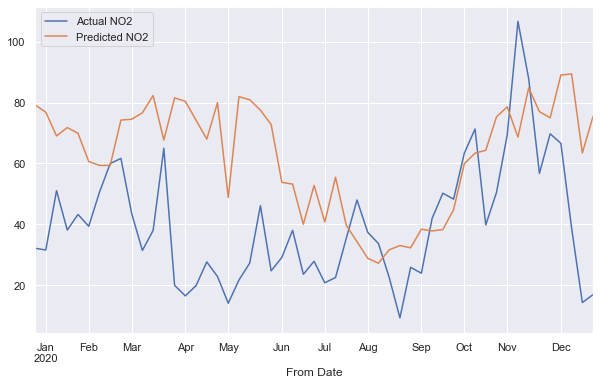

In [32]:
test['NO2'].plot(legend=True, label='Actual NO2', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO2')

In [33]:
np.sqrt(mean_squared_error(test['NO2'],X['pred']))

32.4309295969519

In [34]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 19.214360657262343
MSE: 556.1658286360181
RMSE: 23.58316833328419
R-Squared: -0.9293086402813242


In [35]:
mae = metrics.mean_absolute_error(test['NO2'],X['pred'])
mse = metrics.mean_squared_error(test['NO2'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO2'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 26.449126952024887
MSE: 1051.7651945224507
RMSE: 32.4309295969519
R-Squared: -1.6824680124462255


In [36]:
import pickle
filename = 'NO2_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [37]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-0.9293086402813242


# 3rd plot

In [38]:
testcase = pd.DataFrame()

In [39]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [40]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [41]:
testcase

,test,pred,Corrected
155,76.847143,76.847143,100.430311
156,52.067143,64.427426,40.844258
157,58.215714,84.524169,60.941000
158,58.545714,80.145717,56.562549
159,44.648571,77.681827,54.098658
160,49.550000,70.434690,46.851522
161,50.381429,87.141860,63.558692
162,72.708571,60.515498,84.098667
163,73.708571,66.765829,90.348997
164,88.330000,76.275938,99.859106


In [42]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [43]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.4930779150993997

In [44]:
test2020=pd.DataFrame()

In [45]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [46]:
test2020.index=test.index

In [47]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

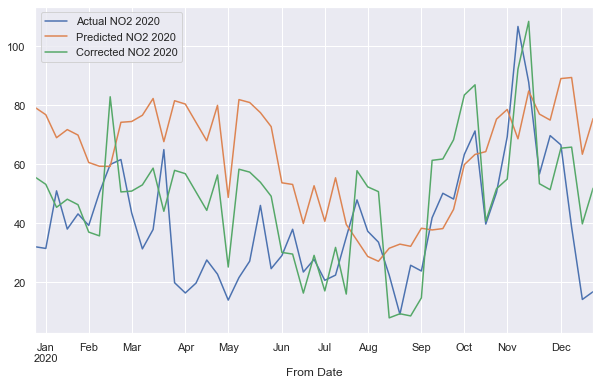

In [48]:
test2020['test'].plot(legend=True, label='Actual NO2 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO2 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO2 2020')

In [49]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.16530932626103545